<ul>
    <li/>Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
    <li/>Cохранить результаты в pandas dataframe
<hr>
    <li/>Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных -- Проверить индекс, чтобы он соответствовал порядку строк -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>
    <li/>Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
</ul>
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -- Рассчитать объемы вводимого жилья по регионам и по годам. -- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -- Визуализировать разброс, связь и распределение этих показателей по регионам -- Сделать выводы по каждому из расчетов и графиков

In [1]:
import requests
import pandas as pd
from tqdm.auto import tqdm
from collections import defaultdict
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
limit_ = 10
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
res = requests.get(url, params={'objStatus': '0'})
num_pages = math.ceil(res.json().get('data').get('total')/limit_)

In [3]:
objids = []
offset_ = 0
for i in tqdm(range(num_pages)):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
    try:
        res = requests.get(url, params={'limit': limit_, 
                                        'offset': offset_, 
                                        'objStatus': '0', 
                                        'sortField': 'devId.devShortCleanNm',
                                        'sortType': 'asc'})
        offset_ += limit_
        objects_list = res.json().get('data').get('list')
        objids.extend([x.get('objId') for x in objects_list])
    except:
        continue

  0%|          | 0/1080 [00:00<?, ?it/s]

In [4]:
len(objids)

10700

In [5]:
dom_info = defaultdict(list)
for objid in tqdm(objids):
    try:
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objid}'
        res = requests.get(url)
        data = res.json().get('data')
        dom_info['id'].append(data.get('id'))
        dom_info['Developer_Nm'].append('{} {}'.format(data.get('developer').get('orgForm').get('shortForm'), 
                                                    data.get('developer').get('devFullCleanNm')))
        dom_info['Building_Region'].append(data.get('region'))
        dom_info['Data_Finish'].append(data.get('objReady100PercDt'))
        dom_info['Floor_Cnt'].append(data.get('objFloorCnt'))
        dom_info['Price_Avg'].append(data.get('objPriceAvg'))
        dom_info['Living_Cnt'].append(data.get('objElemLivingCnt'))
        dom_info['Square_Living'].append(data.get('objSquareLiving'))
        dom_info['Parking_Cnt'].append(data.get('objElemParkingCnt'))
        dom_info['soldOutPerc'].append(data.get('soldOutPerc'))
        dom_info['objLkClassDesc'].append(data.get('objLkClassDesc'))
        dom_info['wallMaterialShortDesc'].append(data.get('wallMaterialShortDesc'))
        dom_info['objLkFinishTypeDesc'].append(data.get('objLkFinishTypeDesc'))
        dom_info['objElevatorPassengerCnt'].append(data.get('objElevatorPassengerCnt'))
        dom_info['objElevatorCargoCnt'].append(data.get('objElevatorCargoCnt'))
        dom_info['objInfrstrPlaygrndCnt'].append(data.get('objInfrstrPlaygrndCnt'))
        dom_info['objInfrstrSportGroundCnt'].append(data.get('objInfrstrSportGroundCnt'))
        dom_info['objGreenHouseFlg'].append(data.get('objGreenHouseFlg'))
        dom_info['objEnergyEffShortDesc'].append(data.get('objEnergyEffShortDesc'))
        dom_info['greenAreaIndexValue'].append(data.get('greenAreaIndexValue'))
        dom_info['airQualityIndexValue'].append(data.get('airQualityIndexValue'))
        dom_info['infrastructureIndexValue'].append(data.get('infrastructureIndexValue'))
    except:
        continue

  0%|          | 0/10700 [00:00<?, ?it/s]

In [60]:
df = pd.DataFrame(dom_info)
df.head(5)

,id,Developer_Nm,Building_Region,Data_Finish,Floor_Cnt,Price_Avg,Living_Cnt,Square_Living,Parking_Cnt,soldOutPerc,...,objLkFinishTypeDesc,objElevatorPassengerCnt,objElevatorCargoCnt,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objGreenHouseFlg,objEnergyEffShortDesc,greenAreaIndexValue,airQualityIndexValue,infrastructureIndexValue
0,13391,АО 2МЕН ГРУПП,72,2022-12-31,12,55893.0,44,4297.44,41,0.450622,...,По желанию заказчика,2.0,2.0,1.0,1.0,0,B,NaN,NaN,9.0
1,13383,АО 2МЕН ГРУПП,72,2022-12-31,20,53109.0,68,6296.55,31,0.406985,...,По желанию заказчика,5.0,1.0,1.0,1.0,0,B,NaN,NaN,10.0
2,13398,АО 2МЕН ГРУПП,72,2024-12-31,10,47886.0,43,4812.98,0,1.000000,...,Без отделки,3.0,3.0,1.0,1.0,0,B,NaN,NaN,10.0
3,13397,АО 2МЕН ГРУПП,72,2024-12-31,12,45523.0,65,6248.51,0,0.999984,...,Без отделки,5.0,4.0,1.0,1.0,0,B,NaN,NaN,10.0
4,13399,АО 2МЕН ГРУПП,72,2024-12-31,1,50768.0,0,0.00,125,0.917243,...,Без отделки,8.0,7.0,0.0,0.0,0,B,NaN,NaN,10.0


In [61]:
df.index += 1
df.head(5)

,id,Developer_Nm,Building_Region,Data_Finish,Floor_Cnt,Price_Avg,Living_Cnt,Square_Living,Parking_Cnt,soldOutPerc,...,objLkFinishTypeDesc,objElevatorPassengerCnt,objElevatorCargoCnt,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objGreenHouseFlg,objEnergyEffShortDesc,greenAreaIndexValue,airQualityIndexValue,infrastructureIndexValue
1,13391,АО 2МЕН ГРУПП,72,2022-12-31,12,55893.0,44,4297.44,41,0.450622,...,По желанию заказчика,2.0,2.0,1.0,1.0,0,B,NaN,NaN,9.0
2,13383,АО 2МЕН ГРУПП,72,2022-12-31,20,53109.0,68,6296.55,31,0.406985,...,По желанию заказчика,5.0,1.0,1.0,1.0,0,B,NaN,NaN,10.0
3,13398,АО 2МЕН ГРУПП,72,2024-12-31,10,47886.0,43,4812.98,0,1.000000,...,Без отделки,3.0,3.0,1.0,1.0,0,B,NaN,NaN,10.0
4,13397,АО 2МЕН ГРУПП,72,2024-12-31,12,45523.0,65,6248.51,0,0.999984,...,Без отделки,5.0,4.0,1.0,1.0,0,B,NaN,NaN,10.0
5,13399,АО 2МЕН ГРУПП,72,2024-12-31,1,50768.0,0,0.00,125,0.917243,...,Без отделки,8.0,7.0,0.0,0.0,0,B,NaN,NaN,10.0


In [8]:
df.Data_Finish.dtype

dtype('O')

In [62]:
df.Data_Finish = pd.to_datetime(df.Data_Finish)

In [10]:
df.describe()

,id,Building_Region,Floor_Cnt,Price_Avg,Living_Cnt,Square_Living,Parking_Cnt,soldOutPerc,objElevatorPassengerCnt,objElevatorCargoCnt,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objGreenHouseFlg,greenAreaIndexValue,airQualityIndexValue,infrastructureIndexValue
count,10669.000000,10669.000000,10669.000000,7.500000e+03,10669.000000,10669.000000,10669.000000,7505.000000,10622.000000,10622.000000,10622.000000,10620.000000,10669.000000,1550.000000,1054.000000,10668.000000
mean,40002.324492,47.575499,12.473803,1.208676e+05,189.353829,9370.533782,37.975443,0.430951,2.354076,0.957635,1.541518,1.370527,0.185116,5.127097,7.092030,5.829865
std,9865.285667,23.477603,8.371237,1.225864e+05,235.228316,11263.817780,119.197351,0.344034,3.612808,2.320496,1.700346,1.696897,0.388410,2.817675,1.394629,2.711361
min,1259.000000,1.000000,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000
25%,37902.000000,25.000000,5.000000,6.694775e+04,40.000000,2076.300000,0.000000,0.103427,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,6.000000,4.000000
50%,43202.000000,50.000000,11.000000,9.167150e+04,120.000000,6387.840000,0.000000,0.375784,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,6.000000,6.000000
75%,46581.000000,69.000000,18.000000,1.361072e+05,253.000000,12532.160000,0.000000,0.736002,3.000000,1.000000,2.000000,1.000000,0.000000,8.000000,8.000000,8.000000
max,49564.000000,92.000000,76.000000,2.228709e+06,2676.000000,142978.700000,3580.000000,1.000000,76.000000,49.000000,20.000000,16.000000,1.000000,10.000000,10.000000,10.000000


In [11]:
df.dtypes

id                                   int64
Developer_Nm                        object
Building_Region                      int64
Data_Finish                 datetime64[ns]
Floor_Cnt                            int64
Price_Avg                          float64
Living_Cnt                           int64
Square_Living                      float64
Parking_Cnt                          int64
soldOutPerc                        float64
objLkClassDesc                      object
wallMaterialShortDesc               object
objLkFinishTypeDesc                 object
objElevatorPassengerCnt            float64
objElevatorCargoCnt                float64
objInfrstrPlaygrndCnt              float64
objInfrstrSportGroundCnt           float64
objGreenHouseFlg                     int64
objEnergyEffShortDesc               object
greenAreaIndexValue                float64
airQualityIndexValue               float64
infrastructureIndexValue           float64
dtype: object

In [13]:
df.columns

Index(['id', 'Developer_Nm', 'Building_Region', 'Data_Finish', 'Floor_Cnt',
       'Price_Avg', 'Living_Cnt', 'Square_Living', 'Parking_Cnt',
       'soldOutPerc', 'objLkClassDesc', 'wallMaterialShortDesc',
       'objLkFinishTypeDesc', 'objElevatorPassengerCnt', 'objElevatorCargoCnt',
       'objInfrstrPlaygrndCnt', 'objInfrstrSportGroundCnt', 'objGreenHouseFlg',
       'objEnergyEffShortDesc', 'greenAreaIndexValue', 'airQualityIndexValue',
       'infrastructureIndexValue'],
      dtype='object')

In [56]:
for i in df.columns:
    print(f'{i}: null: {df.isnull()[i].unique()}')

id: null: [False]
Developer_Nm: null: [False]
Building_Region: null: [False]
Data_Finish: null: [False]
Floor_Cnt: null: [False]
Price_Avg: null: [False  True]
Living_Cnt: null: [False]
Square_Living: null: [False]
Parking_Cnt: null: [False]
soldOutPerc: null: [False  True]
objLkClassDesc: null: [False]
wallMaterialShortDesc: null: [False]
objLkFinishTypeDesc: null: [False]
objElevatorPassengerCnt: null: [False  True]
objElevatorCargoCnt: null: [False  True]
objInfrstrPlaygrndCnt: null: [False  True]
objInfrstrSportGroundCnt: null: [False  True]
objGreenHouseFlg: null: [False]
objEnergyEffShortDesc: null: [False]
greenAreaIndexValue: null: [ True False]
airQualityIndexValue: null: [ True False]
infrastructureIndexValue: null: [False  True]


In [63]:
df.Living_Cnt.replace([0], np.NaN, inplace=True)
print(f'Living_Cnt NaN: {sum((df.Living_Cnt.isna() == True))}')

df.Square_Living.replace([0], np.NaN, inplace=True)
print(f'Square_Living NaN: {sum(df.Square_Living.isna() == True)}')

print(f'Price_Avg NaN: {sum(df.Price_Avg.isna() == True)}')

print(f'objElevatorPassengerCnt NaN: {sum(df.objElevatorPassengerCnt.isna() == True)}')

print(f'objElevatorCargoCnt NaN: {sum(df.objElevatorCargoCnt.isna() == True)}')

print(f'objInfrstrPlaygrndCnt NaN: {sum(df.objInfrstrPlaygrndCnt.isna() == True)}')

print(f'objInfrstrSportGroundCnt NaN: {sum(df.objInfrstrSportGroundCnt.isna() == True)}')

print(f'greenAreaIndexValue NaN: {sum(df.greenAreaIndexValue.isna() == True)}')

print(f'airQualityIndexValue NaN: {sum(df.airQualityIndexValue.isna() == True)}')

print(f'infrastructureIndexValue NaN: {sum(df.infrastructureIndexValue.isna() == True)}')

Living_Cnt NaN: 1235
Square_Living NaN: 1234
Price_Avg NaN: 3169
objElevatorPassengerCnt NaN: 47
objElevatorCargoCnt NaN: 47
objInfrstrPlaygrndCnt NaN: 47
objInfrstrSportGroundCnt NaN: 49
greenAreaIndexValue NaN: 9119
airQualityIndexValue NaN: 9615
infrastructureIndexValue NaN: 1


In [64]:
df.drop(['greenAreaIndexValue', 'airQualityIndexValue'], axis=1, inplace=True)

In [65]:
df['Elevator_Cnt'] = df['objElevatorPassengerCnt'] + df['objElevatorCargoCnt']

In [67]:
df['Parking'] = np.where(df.Parking_Cnt!=0, 1, 0)

In [75]:
df.objInfrstrPlaygrndCnt.replace([np.NaN], 0, inplace=True)
df.objInfrstrSportGroundCnt.replace([np.NaN], 0, inplace=True)

In [68]:
df[df.Parking_Cnt == 1]

,id,Developer_Nm,Building_Region,Data_Finish,Floor_Cnt,Price_Avg,Living_Cnt,Square_Living,Parking_Cnt,soldOutPerc,...,objLkFinishTypeDesc,objElevatorPassengerCnt,objElevatorCargoCnt,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,Elevator_Cnt,Parking
373,35599,ООО ВЕРЕСК,52,2022-12-31,10,87280.0,NaN,NaN,1,0.302777,...,По желанию заказчика,4.0,1.0,0.0,0.0,0,B,10.0,5.0,1
553,8792,ООО ДАРСТРОЙ,24,2023-12-31,2,NaN,NaN,NaN,1,1.000000,...,Другое,0.0,0.0,0.0,0.0,0,Не нормируется,8.0,0.0,1
2312,40816,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК АТОМСТРОЙКОМ...,66,2024-09-30,29,143440.0,172.0,12214.0,1,0.267581,...,Под чистовую,3.0,1.0,6.0,4.0,1,A++,9.0,4.0,1
9307,40816,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК АТОМСТРОЙКОМ...,66,2024-09-30,29,143440.0,172.0,12214.0,1,0.267581,...,Под чистовую,3.0,1.0,6.0,4.0,1,A++,9.0,4.0,1


In [69]:
df.drop(['objElevatorPassengerCnt', 'objElevatorCargoCnt'], axis=1, inplace=True)

In [71]:
corr = df[~df.isnull().any(axis=1)].corr()

In [72]:
mask = np.zeros_like(corr)
np.triu_indices_from(mask)
mask[np.triu_indices_from(mask)] = True

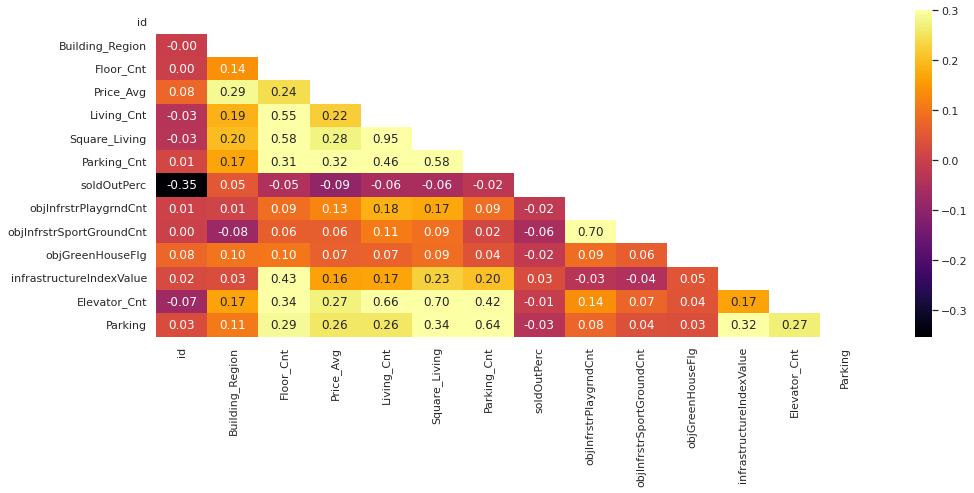

In [345]:
fig, ax1= plt.subplots(figsize=(16,6)) 
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax1)
plt.show();

<h5>Метраж квартиры коррелирует с количеством лифтов в доме, высотностью дома и парковкой
<hr>
Так же коррелирует с этими же параметрами и количество квартир в доме
<hr>
Средняя цена коррелирует с регионом застройки, с наличием парковки

In [76]:
subst1 = df[df.Living_Cnt.isna() != True].groupby(['Elevator_Cnt', 'Floor_Cnt']). \
                                agg({'Living_Cnt' : 'mean'}). \
                                reset_index()[['Elevator_Cnt', 'Floor_Cnt', 'Living_Cnt']]

subst2 = df[df.Square_Living.isna() != True].groupby(['Elevator_Cnt', 'Floor_Cnt']). \
                                   agg({'Square_Living' : 'mean'}). \
                                   reset_index()[['Elevator_Cnt', 'Floor_Cnt', 'Square_Living']]

subst3 = df[df.Price_Avg.isna() != True].groupby(['Building_Region', 'Parking']). \
                               agg({'Price_Avg' : 'mean'}). \
                               reset_index()[['Building_Region', 'Parking', 'Price_Avg']]

subst1.rename(columns={'Elevator_Cnt': 'Elevator_Cnt', \
                       'Floor_Cnt': 'Floor_Cnt', \
                       'Living_Cnt': 'Avg_Living_Cnt_on_Dev'}, inplace=True)
subst2.rename(columns={'Elevator_Cnt': 'Elevator_Cnt', \
                       'Floor_Cnt': 'Floor_Cnt', \
                       'Square_Living': 'Avg_Living_on_Dev'}, inplace=True)
subst3.rename(columns={'Building_Region': 'Building_Region', \
                       'Parking': 'Parking',\
                       'Price_Avg': 'Avg_Price_on_Dev'}, inplace=True)

In [77]:
df = df.merge(subst1, on=['Elevator_Cnt', 'Floor_Cnt'], how='left').\
               merge(subst2, on=['Elevator_Cnt', 'Floor_Cnt'], how='left').\
               merge(subst3, on=['Building_Region', 'Parking'], how='left')
print(df.shape)
df.sample(5)

(10669, 23)


,id,Developer_Nm,Building_Region,Data_Finish,Floor_Cnt,Price_Avg,Living_Cnt,Square_Living,Parking_Cnt,soldOutPerc,...,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,Elevator_Cnt,Parking,Avg_Living_Cnt_on_Dev,Avg_Living_on_Dev,Avg_Price_on_Dev
6865,42713,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК САМОЛЕТ-КОРО...,50,2023-09-30,18,143173.0,352.0,15981.04,0,0.423489,...,2.0,2.0,1,A,1.0,4.0,0,268.370000,12736.739500,126246.230444
3074,33309,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ГРУППА КОМПА...,36,2023-03-31,22,93108.0,316.0,23698.46,219,0.456033,...,1.0,1.0,0,B,8.0,6.0,1,345.000000,18957.689333,90042.040000
9642,38950,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИКСАКУРА,54,2023-03-31,10,197483.0,87.0,6260.63,94,0.341074,...,1.0,1.0,0,B,10.0,4.0,1,161.666667,8258.735200,114375.663265
9900,4452,ООО СТРОИТЕЛЬНАЯ КОМПАНИЯ ПЕРВЫЙ,44,2023-03-31,2,24730.0,8.0,415.20,0,1.000000,...,1.0,1.0,0,B,1.0,0.0,0,6.992453,658.556245,46404.025641
4049,45978,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ИЛЬИНКА 3/8,77,2024-09-30,4,1250000.0,NaN,NaN,0,0.155009,...,0.0,0.0,0,Не нормируется,9.0,0.0,0,47.738220,2381.178482,305203.238806


In [78]:
df['new_Living_Cnt'] = df.Living_Cnt.combine_first(df.Avg_Living_Cnt_on_Dev)
df['new_Square_Living'] = df.Square_Living.combine_first(df.Avg_Living_on_Dev)
df['new_Price_Avg'] = df.Price_Avg.combine_first(df.Avg_Price_on_Dev)

In [79]:
print(len(df['new_Living_Cnt'][(df.new_Living_Cnt.isna() == True)]))

print(len(df['new_Square_Living'][(df.new_Square_Living.isna() == True)]))

print(len(df['new_Price_Avg'][(df.new_Price_Avg.isna() == True)]))

83
83
12


In [80]:
df.drop(df[(df.new_Living_Cnt.isna() == True) \
         | (df.new_Square_Living.isna() == True) \
         | (df.new_Price_Avg.isna() == True) \
         | (df.infrastructureIndexValue.isna() == True) ].index, axis=0, inplace=True)

In [84]:
print(f'new_Living_Cnt NaN: {sum((df.new_Living_Cnt.isna() == True))}')

print(f'new_Square_Living NaN: {sum(df.new_Square_Living.isna() == True)}')

print(f'new_Price_Avg NaN: {sum(df.new_Price_Avg.isna() == True)}')

df.Elevator_Cnt.fillna(0, inplace=True)
print(f'Elevator_Cnt NaN: {sum(df.Elevator_Cnt.isna() == True)}')

print(f'objInfrstrPlaygrndCnt NaN: {sum(df.objInfrstrPlaygrndCnt.isna() == True)}')

print(f'objInfrstrSportGroundCnt NaN: {sum(df.objInfrstrSportGroundCnt.isna() == True)}')

print(f'infrastructureIndexValue NaN: {sum(df.infrastructureIndexValue.isna() == True)}')

new_Living_Cnt NaN: 0
new_Square_Living NaN: 0
new_Price_Avg NaN: 0
Elevator_Cnt NaN: 0
objInfrstrPlaygrndCnt NaN: 0
objInfrstrSportGroundCnt NaN: 0
infrastructureIndexValue NaN: 0


In [86]:
df.drop(['Price_Avg', 'Living_Cnt', 'Square_Living', \
         'Avg_Living_Cnt_on_Dev', 'Avg_Living_on_Dev', \
         'Avg_Price_on_Dev'], axis=1, inplace=True)

In [87]:
df.dtypes

id                                   int64
Developer_Nm                        object
Building_Region                      int64
Data_Finish                 datetime64[ns]
Floor_Cnt                            int64
Parking_Cnt                          int64
soldOutPerc                        float64
objLkClassDesc                      object
wallMaterialShortDesc               object
objLkFinishTypeDesc                 object
objInfrstrPlaygrndCnt              float64
objInfrstrSportGroundCnt           float64
objGreenHouseFlg                     int64
objEnergyEffShortDesc               object
infrastructureIndexValue           float64
Elevator_Cnt                       float64
Parking                              int64
new_Living_Cnt                     float64
new_Square_Living                  float64
new_Price_Avg                      float64
dtype: object

In [337]:
df.id = df.id.astype('object')
df.Building_Region = df.Building_Region.astype('object')
df.objInfrstrPlaygrndCnt  = df.objInfrstrPlaygrndCnt.astype('int32')
df.objInfrstrSportGroundCnt = df.objInfrstrSportGroundCnt.astype('int32')
df.objGreenHouseFlg = df.Parking.astype('object')
df.infrastructureIndexValue = df.infrastructureIndexValue.astype('int32')
df.Elevator_Cnt = df.Elevator_Cnt.astype('int64')
df.Parking = df.Parking.astype('object')
df.new_Living_Cnt = df.new_Living_Cnt.astype('int64')
df.Parking_Cnt = df.Parking_Cnt.astype('int64')

In [338]:
print(len(df))
df.sample(5)

10573


,id,Developer_Nm,Building_Region,Data_Finish,Floor_Cnt,Parking_Cnt,soldOutPerc,objLkClassDesc,wallMaterialShortDesc,objLkFinishTypeDesc,...,objInfrstrSportGroundCnt,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,Elevator_Cnt,Parking,new_Living_Cnt,new_Square_Living,new_Price_Avg,Year_Finish
4068,39589,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ИМПУЛЬС ГРУПП,16,2023-09-30,5,83,0.700868,Элитный,Монолит-кирпич,Без отделки,...,2,1,C,8,0,1,42,3839.540000,330440.000000,2023
6520,48509,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК РЕМСТРОЙЦЕНТР,25,2023-12-31,4,0,NaN,Комфорт,Монолит-кирпич,По желанию заказчика,...,1,0,A++,1,0,0,21,962.320000,124996.852713,2023
2956,44543,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ГЕЛЕОН СТРОЙ,54,2023-12-31,2,0,NaN,Типовой,Кирпич,Под чистовую,...,0,0,C,1,0,0,1,59.800000,82475.810573,2023
9774,38223,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИКФОРУМ-ЧАЙКА,91,2022-12-31,3,0,0.772367,Комфорт,Монолит-кирпич,Под чистовую,...,0,0,C,2,0,0,30,1685.703587,119975.000000,2022
7101,45091,ООО СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК СЕРЕДНЕВО,77,2024-12-31,17,0,0.203136,Комфорт,Монолит-кирпич,По желанию заказчика,...,3,0,C,1,10,0,355,14482.900000,192023.000000,2024


-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -- Рассчитать объемы вводимого жилья по регионам и по годам. -- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -- Визуализировать разброс, связь и распределение этих показателей по регионам -- Сделать выводы по каждому из расчетов и графиков

In [124]:
mean_on_reg = df[['Building_Region', 'new_Price_Avg']].groupby('Building_Region').agg('mean')

In [125]:
mean_on_reg.head(3)

,new_Price_Avg
Building_Region,
1,70619.799764
2,83944.218104
3,68839.836785


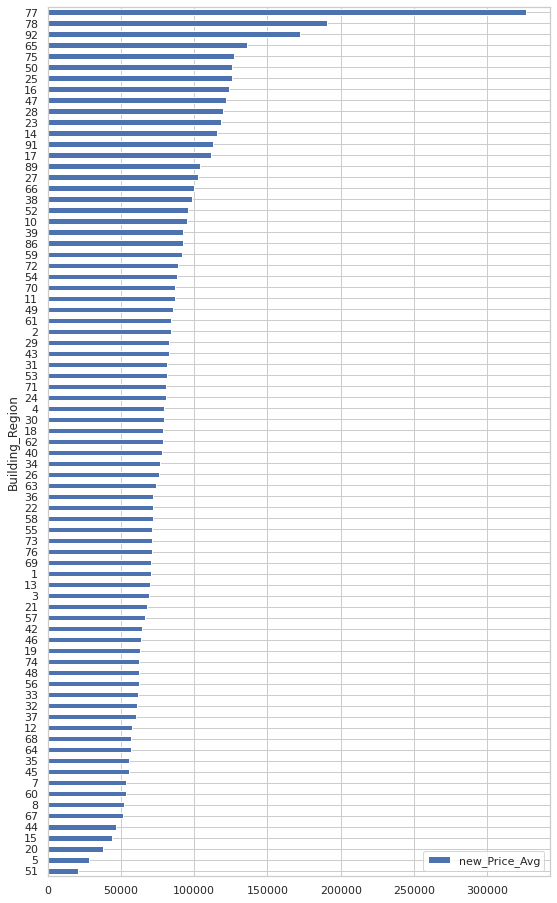

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,16

mean_on_reg.sort_values(by='new_Price_Avg', ascending=True).plot(kind='barh')
plt.show()

<h5>Самые дорогие регионы по средней стоимости жилья:
<ol>
    <li/> г. Москва
    <li/> г. Санкт-Петербург
    <li/> город федерального значения Севастополь
</ol>

In [131]:
df['Year_Finish'] = df.Data_Finish.dt.year

In [206]:
reg_year_finish = df[['Building_Region', 'Year_Finish']].groupby(['Building_Region', 'Year_Finish']) \
                                                        .value_counts() \
                                                        .reset_index(name='cnt') \
                                                        .sort_values(by='cnt', ascending=False)

<h5>Топ-5 введения домов в эксплуатацию после 2023 года по регионам и году:

In [222]:
reg_year_finish[reg_year_finish.Year_Finish > 2023].head(5)

,Building_Region,Year_Finish,cnt
398,77,2024,319
88,23,2024,285
89,23,2025,257
252,50,2024,202
405,78,2024,194


Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -- Визуализировать разброс, связь и распределение этих показателей по регионам

In [224]:
df[['Floor_Cnt', 'new_Living_Cnt', 'new_Square_Living', 'Parking_Cnt', 'new_Square_Living', 'Building_Region']].head(3)

,Floor_Cnt,new_Living_Cnt,new_Square_Living,Parking_Cnt,new_Square_Living,Building_Region
0,12,44,4297.44,41,4297.44,72
1,20,68,6296.55,31,6296.55,72
2,10,43,4812.98,0,4812.98,72


In [339]:
df_for_plots = df[['Floor_Cnt', 'new_Living_Cnt', 'new_Square_Living', \
                   'Parking_Cnt', 'Building_Region']].groupby('Building_Region').mean().reset_index()

In [340]:
df_for_plots.sample(5)

,Building_Region,Floor_Cnt,new_Living_Cnt,new_Square_Living,Parking_Cnt
61,65,8.351852,95.074074,4947.385231,7.111111
3,4,8.000000,83.250000,3655.858750,3.750000
6,8,7.272727,69.454545,4295.480000,0.000000
70,74,9.850299,143.820359,7338.302057,5.994012
65,69,11.014706,114.750000,5836.157561,3.147059


''

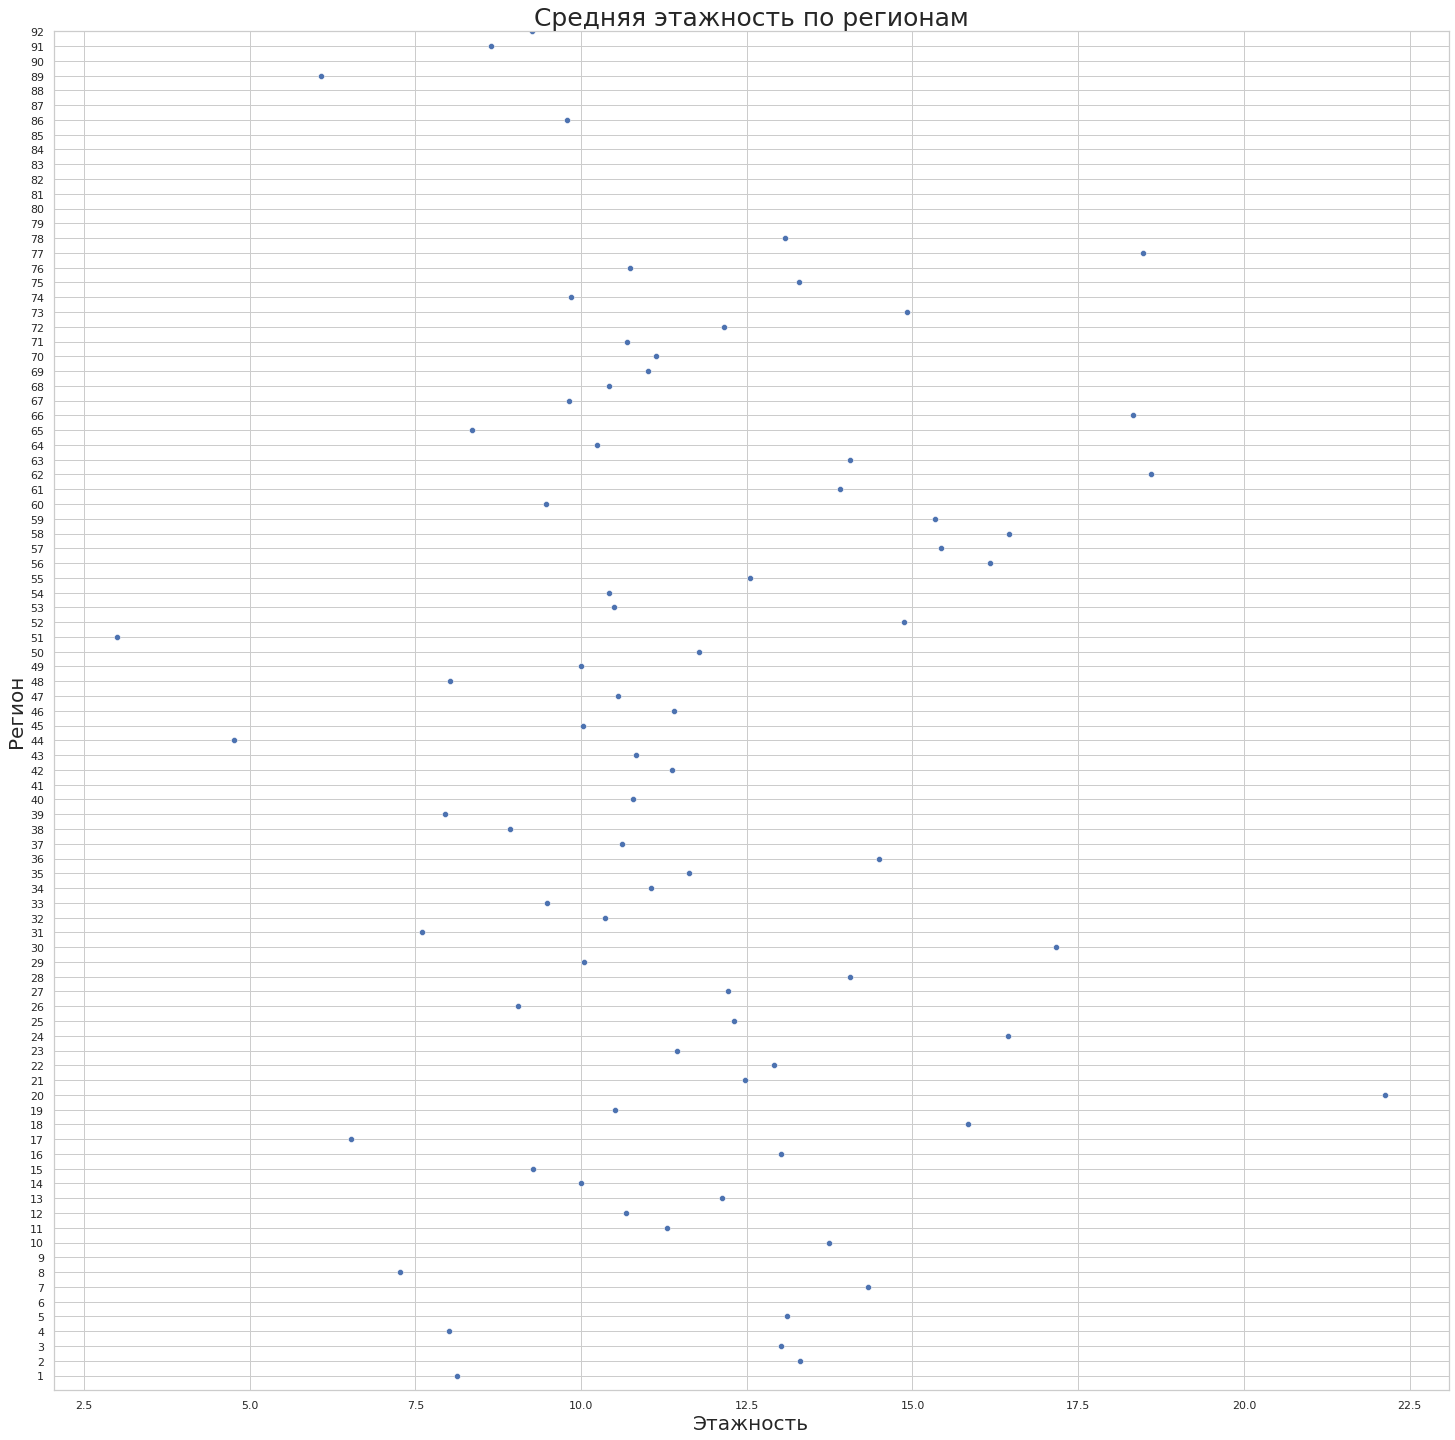

In [315]:
rcParams['figure.figsize'] = 25,25
ax = sns.scatterplot(data=df_for_plots, x=df_for_plots.Floor_Cnt, y=df_for_plots.Building_Region)

ax.set(ylim=(0, 92))
ax.set_yticks(np.arange(1, 93, 1))
plt.title("Средняя этажность по регионам", fontsize = 25)
plt.xlabel("Этажность", fontsize = 20)
plt.ylabel("Регион", fontsize = 20)
;

''

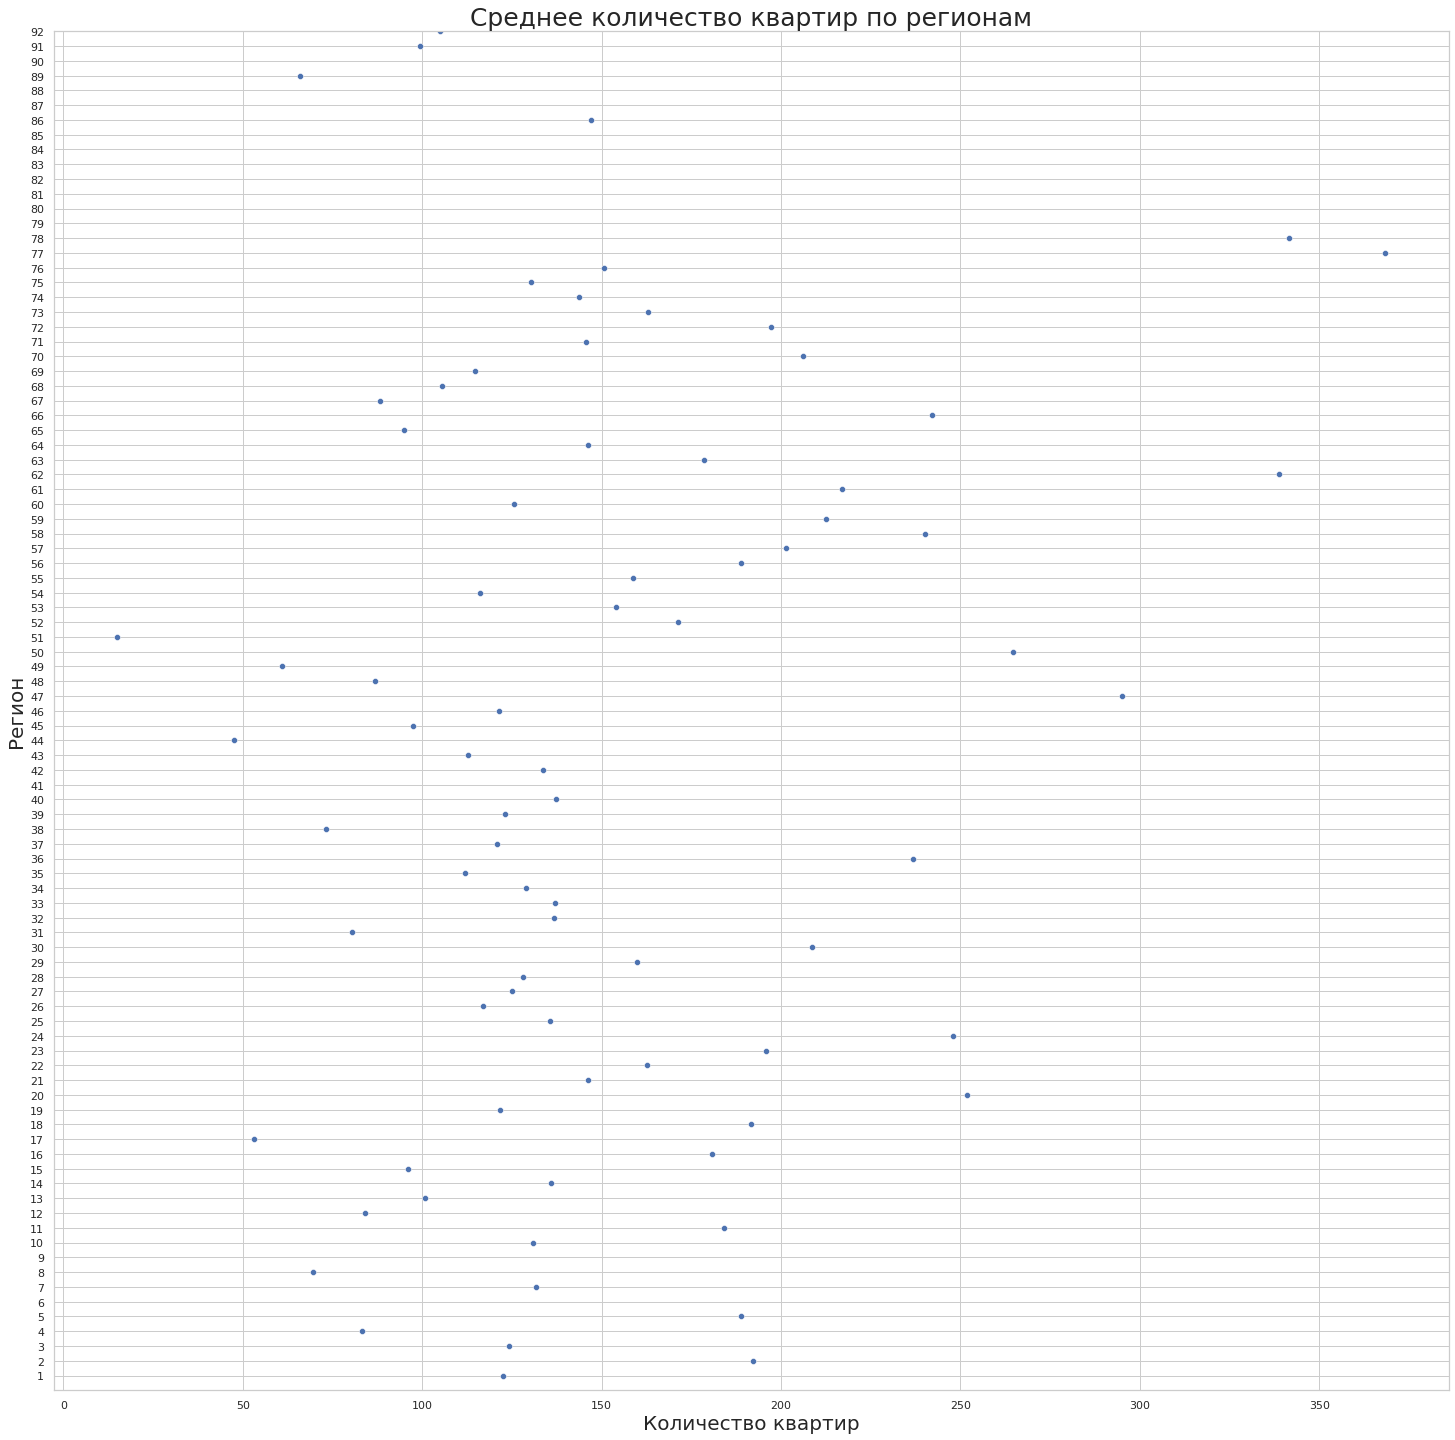

In [316]:
ax = sns.scatterplot(data=df_for_plots, x=df_for_plots.new_Living_Cnt, y=df_for_plots.Building_Region)

ax.set(ylim=(0, 92))
ax.set_yticks(np.arange(1, 93, 1))
plt.title("Среднее количество квартир по регионам", fontsize = 25)
plt.xlabel("Количество квартир", fontsize = 20)
plt.ylabel("Регион", fontsize = 20)
;

''

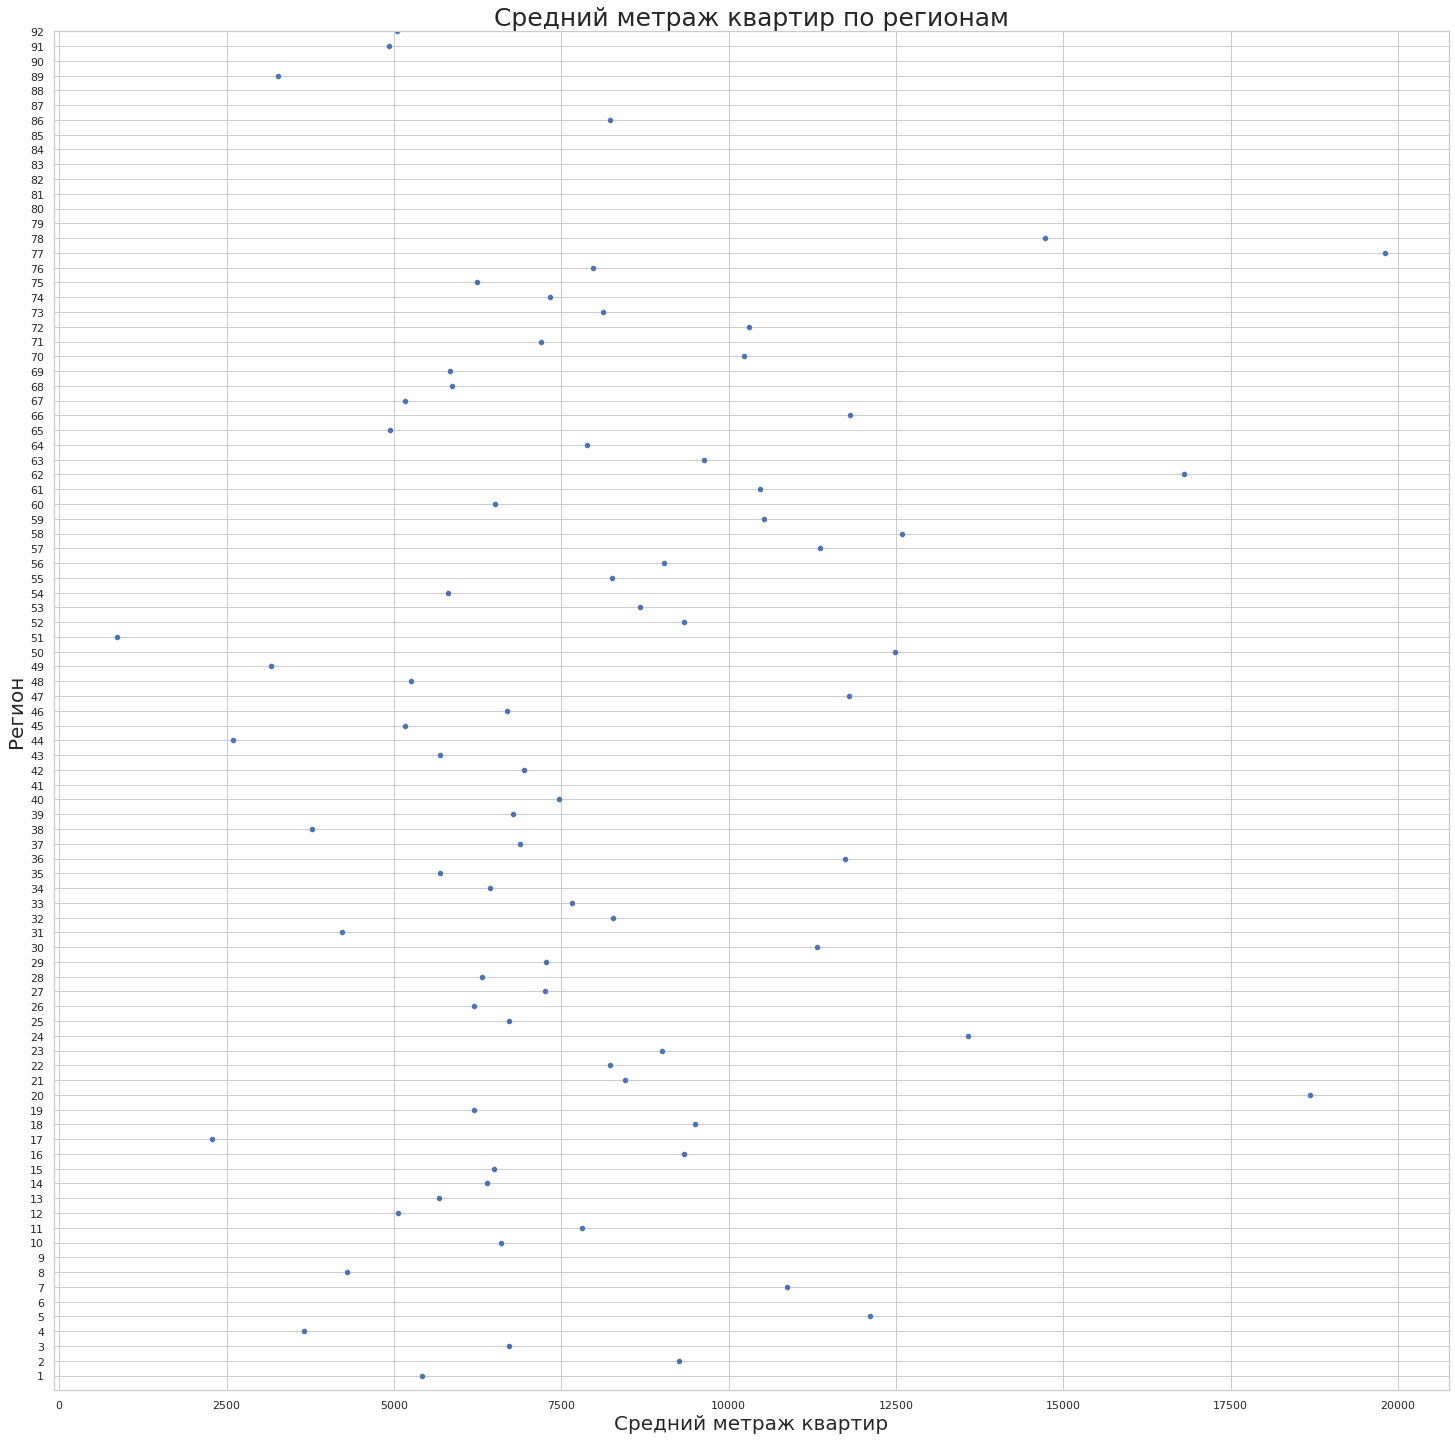

In [341]:
ax = sns.scatterplot(data=df_for_plots, x=df_for_plots.new_Square_Living, y=df_for_plots.Building_Region)

ax.set(ylim=(0, 92))
ax.set_yticks(np.arange(1, 93, 1))
plt.title("Средний метраж квартир по регионам", fontsize = 25)
plt.xlabel("Средний метраж квартир", fontsize = 20)
plt.ylabel("Регион", fontsize = 20)
;

<h5>В Москве сдача квартир происходит в большем количеством и с большим метражом

''

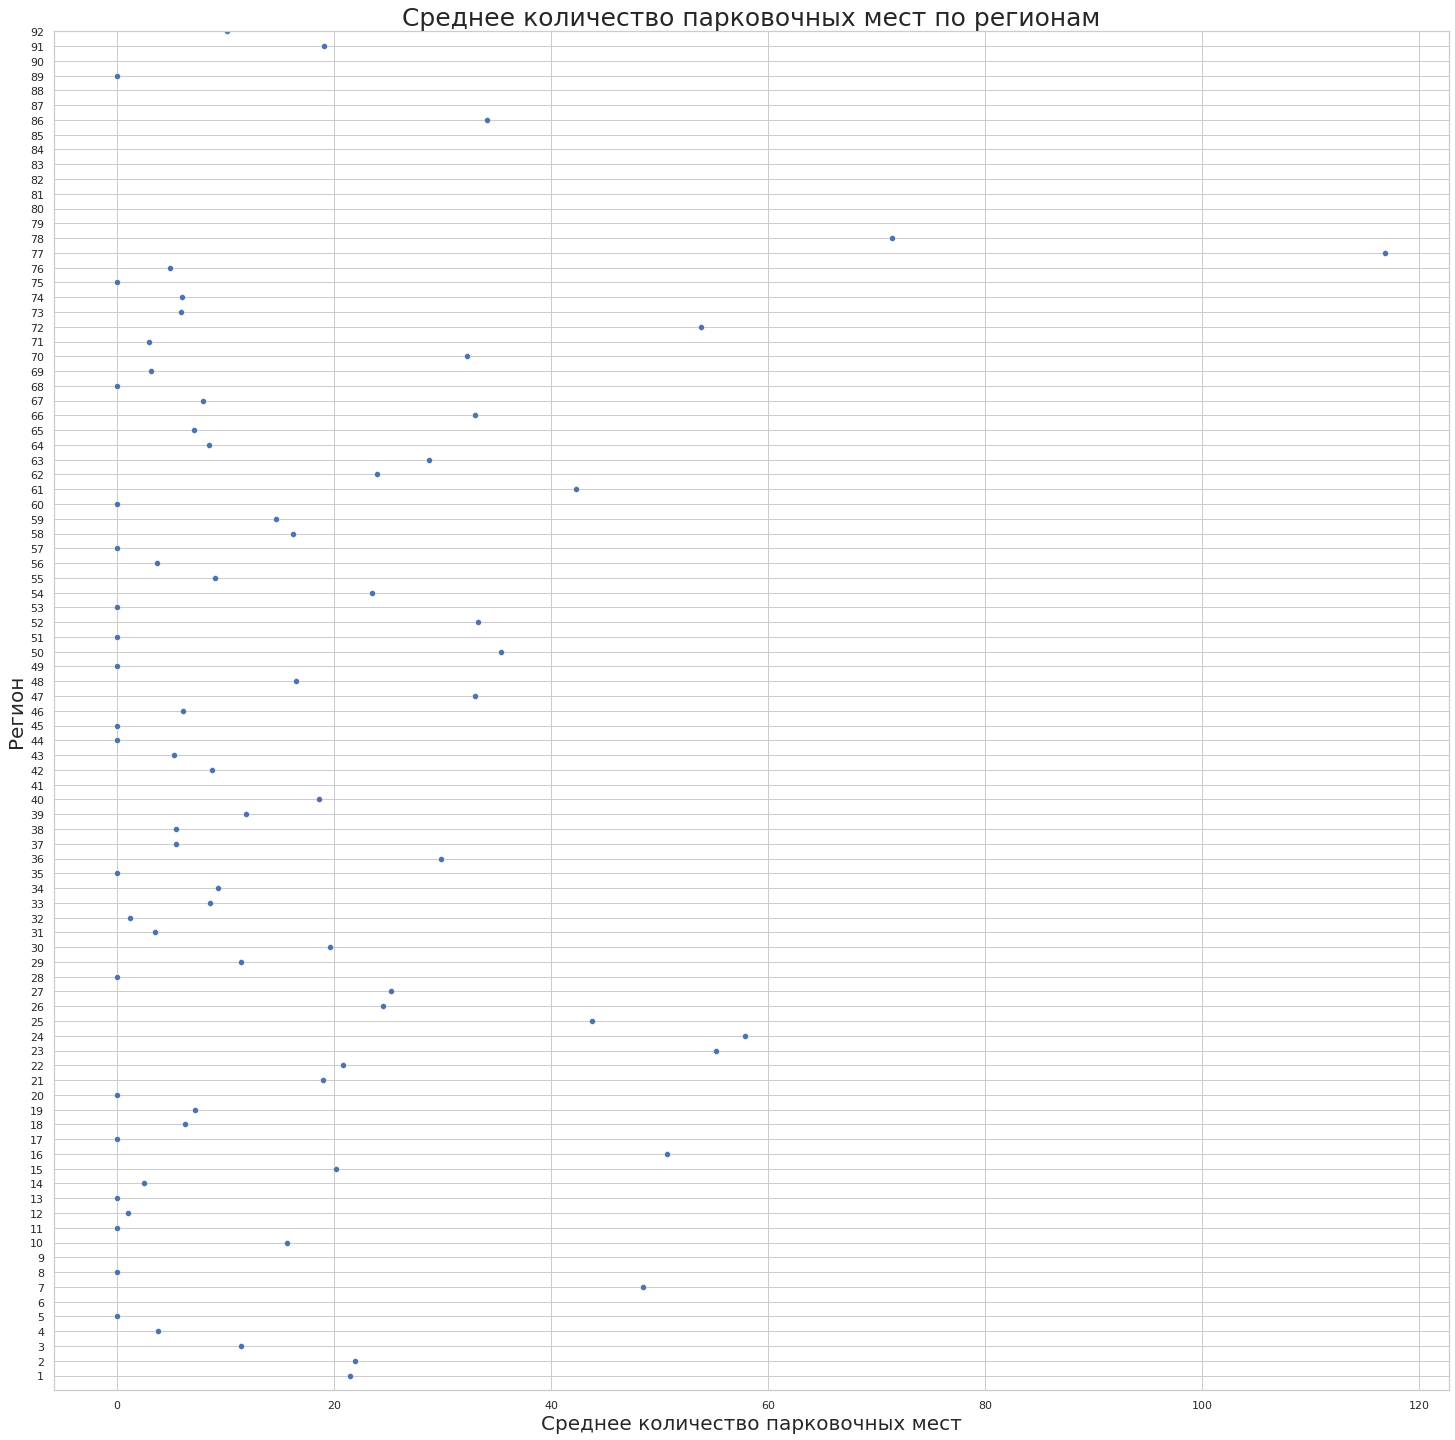

In [342]:
ax = sns.scatterplot(data=df_for_plots, x=df_for_plots.Parking_Cnt, y=df_for_plots.Building_Region)

ax.set(ylim=(0, 92))
ax.set_yticks(np.arange(1, 93, 1))
plt.title("Среднее количество парковочных мест по регионам", fontsize = 25)
plt.xlabel("Среднее количество парковочных мест", fontsize = 20)
plt.ylabel("Регион", fontsize = 20)
;

<h5>Застройщики в большинстве случаев не предоставляют парковочные места